패키지 임포트 및 렌덤 시드 생성

In [1]:
import numpy as np

np.random.seed(42) #42가 룰인 렌덤시드 생성

2차원 데이터 생성하기

In [2]:
N=500
X = np.random.randn(N,2) #randn으로 분포 생성 (가우시안 평균 0 표준편차 1 인 randn)

X.shape

(500, 2)

3차원을 위한 x,y 좌표생성 (직교좌표계라 하더라)

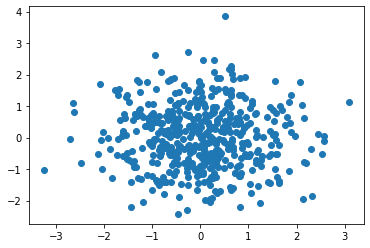

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1])

plt.show()

In [4]:
x1 = np.arange(-3, 3.1, 0.1) 
y1 = np.arange(-3, 3.1, 0.1)
x,y = np.meshgrid(x1,y1) #넘파이도 매쉬그리드가 있다

x1.shape, y1.shape, x.shape, y.shape

((61,), (61,), (61, 61), (61, 61))

원활한 연산을 위한 직교좌표계를 간단한 행렬로 변경한다. (각 직교좌표계마다 값을 1*2 백터로 받기위해)

In [5]:
X = np.reshape(x, (-1,1)) #n*2 배열로 아래 만들어 주기위해 리쉐이프를 먼저한다.
Y = np.reshape(y, (-1,1))
XY = np.hstack((X,Y)) #hstack (horizontal) direction으로 쌓기위해 hstack을 사용한다. 사용시 가로를 밖에 하나더 씌어 주어야한다. 씽이라 그런건가..

X.shape, Y.shape, XY.shape

((3721, 1), (3721, 1), (3721, 2))

In [6]:
m = [0,0] #평균을 만들어 준다
s = np.eye(2) #넘파이도 단위행렬eye가 있더라. 
m, s

([0, 0], array([[1., 0.],
        [0., 1.]]))

In [7]:
pxy = [] #계속 돌리다보면 for에 저장되니 깡통을 만들어서 돌릴때마다 리셋 해준다.

for i in range(XY.shape[0]):
  pxy = np.append(pxy, 1/np.sqrt(2*np.pi*2*np.pi*np.linalg.det(s)) * np.exp(-1/2*(XY[i,:]-m) @ np.linalg.inv(s)@(XY[i,:]-m).T))
    #append를 사용해서 옆으로 붙여준다 / np.pi는 3.14 / np.linalg.det는 determinant, 행렬식(행렬 -> 숫자) / exp는 exponantial ()안을 지수로 만들어줌 / linalg.inv는 inverse 역행렬
    #np.exp 앞의 값을 실수로 추정되니 *로 스칼라곱해주고, np.linalg앞은 1*2 행렬과 그뒤 2*1행렬이니 @로 행렬곱셈해준다.
    #!파이썬 행렬의 곱셈에서는 뒤에 백터(n*1 이던 1*n)는 @ 연산을 쓰면 자동으로 앞의열과 백터의 길이만 맞으면 자동으로 연산을 한다. 결과 값은 당연 (n, )으로 표현된다?


pxy.shape, pxy, type(pxy)

((3721,), array([1.96412803e-05, 2.63807214e-05, 3.50800815e-05, ...,
        3.50800815e-05, 2.63807214e-05, 1.96412803e-05]), numpy.ndarray)

In [8]:
pxy = pxy.reshape(x.shape)

pxy.shape

(61, 61)

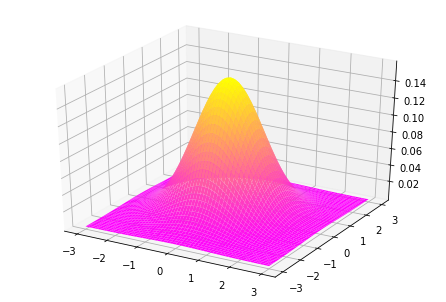

In [9]:
from mpl_toolkits.mplot3d import Axes3D #plot 3D 그리는 툴킷이라고 함

fig = plt.figure() #plt.figure를 호출해서 fig라는 변수에 저장
ax = Axes3D(fig) #Axes3D모듈에 위에서 저장한 plt.figure를 불러와서 ax에 저장 
ax.plot_surface(x, y, pxy, rstride=1, cstride=1, cmap='spring') #3D 추출함수는 ax.plot_surface로 기억하자
  #rstride, cstride는 각각 row와 column의 샘플 추출 간격 (값이 커지면 격자가 커진다)

plt.show()